# Определение перспективного тарифа для телеком компании

**Цель проекта** - исследование данных о тарифных планах оператора сотовой связи для получения информации о том, какой тарифный план более выгоден компании.

Массивы данных содержат в себе информацию о: 
- параметрах абонентов;
- условиях тарифов;
- совершенных операциях.

В ходе исследования решается ряд **задач**:
- заполнение пропусков в столбцах, где это возможно; 
- изменение типов данных в столбцах;
- объединение таблиц в одну общую на основе группировки по пользователям и месяцу, в котором совершались операции;
- проведение анализа данных в разрезе тарифных планов:
    + среднемесячной длительности звонков;
    + среднемесячного количества сообщений;
    + среднемесячного объема интернет-трафика;
- проверка статистических гипотез:
    + о равенстве средней выручки пользователей на разных тарифах;
    + о равенстве средней выручки пользователей из Москвы и регионов.

## Содержание

Обзор данных
Подготовка данных

- Предобработка информации
- Статистика в разрезе пользователей

Анализ тарифных планов

- Продолжительность звонков
- Количество сообщений
- Объем интернет-трафика

Проверка гипотез

- Средняя выручка на разных тарифах
- Средняя выручка в Москве и регионах

Общий вывод исследования

### Шаг 1. Изучение общей информации <a name="review"></a>

Импорт библиотек, которые потребуются для выполнения исследования:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Считывание файлов с данными в датафреймы:

In [138]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Получение данных о первых 10 строках таблицы **calls**:

In [6]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Общая информация о данных таблицы **calls**:

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице **calls** представлена информация о звонках пользователей. В ней 4 столбца: 

- **id** - идентификатор звонка / строковый тип данных
- **call_date** - дата звонка / строковый тип данных
- **duration** - продолжительность звонка в минутах / числа с плав.точкой
- **user_id** - идентификатор пользователя, совершившего звонок / целочисл. тип данных

Общее количество записей о звонках - 202607. Пропусков нет.

---

Получение данных о первых 10 строках таблицы **internet**:

In [8]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


Общая информация о данных таблицы **internet**:

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице **internet** собрана информация о звонках пользователей. В ней 5 столбцов: 

- **Unnamed: 0** - порядковый номер строки таблицы (удалим ненужный столбец на следующем этапе) / целочисл. тип данных
- **id** - идентификатор интернет-сессии / строковый тип данных
- **mb_used** - объем использованного интернет-трафика, Мб / числа с плав.точкой
- **session_date** - дата интернет-сессии / строковый тип данных
- **user_id** - идентификатор пользователя, воспользовавшегося мобильным интернетом / целочисл. тип данных

Общее количество записей об интернет-сессиях - 149396. Пропусков нет.

---

Получение данных о первых 10 строках таблицы **messages**:

In [10]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Общая информация о данных таблицы **messages**:

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице **messages** представлена информация об отправленных сообщениях. Она состоит из 3 столбцов: 

- **id** - идентификатор сообщения / строковый тип данных
- **message_date** - дата отправки сообщения / строковый тип данных
- **user_id** - идентификатор пользователя, отправившего сообщение / целочисл. тип данных

Общее количество записей о сообщениях - 123036. Пропусков нет.

---

Получение данных о первых строках таблицы **tariffs**:

In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Общая информация о данных таблицы **tariffs**:

In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице **tariffs** всего 2 строки, каждая из которых описывает тот или иной тариф оператора сотовой связи. У тарифных планов 8 параметров: 

- **messages_included** - количество включенных сообщений / целочисл. тип данных
- **mb_per_month_included** - объем доступного интернет-трафика / целочисл. тип данных
- **minutes_included** - количество включенных минут разговора / целочисл. тип данных
- **rub_monthly_fee** - ежемесячная абонентская плата / целочисл. тип данных
- **rub_per_gb** - стоимость 1 Гб интернет-трафика при превышении объема, включенного в пакет / целочисл. тип данных
- **rub_per_message** - стоимость 1 SMS при превышении количества, включенного в пакет / целочисл. тип данных
- **rub_per_minute** - стоимость 1 минуты разговора сверх времени, включенного в пакет / целочисл. тип данных
- **tariff_name** - название тарифного плана / строковый тип данных

---

Получение данных о первых 10 строках таблицы **users**:

In [14]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


Общая информация о данных таблицы **users**:

In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице **users** представлены данные абонентов. В ней 8 столбцов: 

- **user_id** - идентификатор пользователя / целочисл. тип данных
- **age** - возраст / целочисл. тип данных
- **churn_date** - дата прекращения пользования тарифом / строковый тип данных
- **city** - город проживания / строковый тип данных
- **first_name** - имя / строковый тип данных
- **last_name** - фамилия / строковый тип данных
- **reg_date** - дата подключения тарифа / строковый тип данных
- **tariff** - название тарифного плана / строковый тип данных

Общее количество записей об абонентах - 500. Пропуски есть только в столбце **churn_date**.


### Вывод

Таблица **tariffs** содержит информацию о параметрах тарифов - название, абонентскую плату, объемы услуг, входящих в нее, а также стоимость превышения лимитов.

В таблице **users** находятся данные абонентов - id, имя и фамилия, возраст, город проживания, дата подключения и отключения тарифа, название тарифного плана.

Таблицы **calls**, **messages**, **internet** состоят из записей о дате каждой активности пользователя и содержат его характеристику - продолжительность звонка / факт отправки сообщения / объем использованного интернет-трафика.

Задачи, которые нужно решить, прежде чем приступить к поиску ответов на поставленные вопросы:

- обработка пропусков данных в столбцах;
- изменение типов данных в столбцах;
- объединение таблиц в одну общую на основе группировки по id пользователя и месяцу, в котором была совершена операция.

### Шаг 2. Подготовка данных <a name="preparation"></a>

**Предобработка информации** <a name="pretreatment"></a>

Перед тем как объединить все датафреймы в один, рассмотрим отдельно важные для дальнейшего анализа столбцы каждой таблицы на предмет наличия ошибок в данных, а также приведем их к нужным типам, где это необходимо. 

#### **Таблица tariffs**

In [16]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица состоит из двух строк, пропусков нет, все данные корректны. Для удобства восприятия переведем мегабайты в гигабайты и поменяем тип на целочисленный (в пакетах услуг предусмотрено целое число Гб):

In [17]:
tariffs['mb_per_month_included'] = (tariffs['mb_per_month_included'] / 1024).astype('int')

In [18]:
tariffs.rename(columns = {'mb_per_month_included' : 'gb_per_month_included'}, inplace=True)

#### **Таблица users**

In [19]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


#### 1. user_id 

Повторяющихся идентификаторов нет; значения лежат в диапазоне от 1000 до 1499, поэтому пропусков в нумерации тоже нет:

In [20]:
users['user_id'].nunique()

500

In [21]:
users['user_id'].min()

1000

In [22]:
users['user_id'].max()

1499

Данные корректны.

#### 2. age 

In [23]:
users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

Самому молодому абоненту 18 лет, самому пожилому - 75. Средний возраст пользователей примерно 46 лет (медианное значение почти совпадает со средним). Данные корректны.

#### 3. churn_date 

Поменяем в указанном столбце тип данных со строкового на даты:

In [24]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Количество незаполненных ячеек:

In [25]:
users['churn_date'].isna().sum()

462

Проверим, действительно ли все заполненные даты относятся к 2018 г. (по условию предоставлена информация только об активностях пользователей за 2018 г).

In [26]:
users.query('2018 <= churn_date < 2019')['churn_date'].value_counts().sum()

38

Действительно, все указанные даты относятся к 2018 году.

Согласно условию, пропуск в столбце означает, что на момент выгрузки данных тариф еще действовал. Тогда в пустых ячейках можно указать 31-12-2018, так как эти пользователи оставались на своем тарифе до указанной даты, а предоставленные данные ограничены 2018-м годом.

In [27]:
users.loc[users['churn_date'].isna(), 'churn_date'] = pd.to_datetime('2018-12-31')

Пропуски ушли:

In [28]:
users['churn_date'].isna().sum()

0

In [29]:
users['churn_date'].head()

0   2018-12-31
1   2018-12-31
2   2018-12-31
3   2018-12-31
4   2018-12-31
Name: churn_date, dtype: datetime64[ns]

#### 4. city 

In [30]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Архангельск         1
Иваново             1
Нижневартовск       1
Подольск            1
Химки               1
Name: city, Length: 76, dtype: int64

Больше всего абонентов из Москвы и Санкт-Петербурга. В первом приближении данные выглядят корректно.

#### 5. reg_date 

Поменяем в указанном столбце тип данных со строкового на даты:

In [31]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

Пропусков нет:

In [32]:
users['reg_date'].isna().sum()

0

Все пользователи были зарегистрированы на своих тарифах не ранее 2018 г.:

In [33]:
users.loc[users['reg_date'] < '2018-01-01']['reg_date'].count()

0

Данные корректны.

#### 5. tariff 

In [34]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Посторонних значений в столбце нет.

Переименуем столбец, чтобы его название совпадало с названием соответствующего столбца датафрейма **tariffs**:

In [35]:
users.rename(columns = {'tariff' : 'tariff_name'}, inplace=True)

#### **Таблица calls**

In [36]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


#### 1. id 

Среди идентификаторов звонков нет ни пропусков, ни повторяющихся значений.

In [37]:
calls['id'].nunique()

202607

#### 2. call_date 

Поменяем в указанном столбце тип данных со строкового на даты:

In [38]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

Пропусков нет:

In [39]:
calls['call_date'].isna().sum()

0

Все звонки были совершены в 2018 г.:

In [40]:
calls.loc[('2018-01-01' <= calls['call_date']) & (calls['call_date'] < '2019-01-01')]['call_date'].count()

202607

Данные корректны.

#### 3. duration 

In [41]:
calls['duration'].head()

0     0.00
1     0.00
2     2.85
3    13.80
4     5.18
Name: duration, dtype: float64

Оператор сотовой связи всегда округляет вверх значения минут: если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Поскольку далее необходимо анализировать израсходованные минуты, а не реальную продолжительность разговора, округлим данные вверх до ближайшего целого:

In [42]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [43]:
calls['duration'].head()

0     0.0
1     0.0
2     3.0
3    14.0
4     6.0
Name: duration, dtype: float64

Можно привести данные к целочисленному типу:

In [44]:
calls['duration'] = calls['duration'].astype('int')

In [45]:
calls['duration'].value_counts().head()

0    39613
7    11510
6    11457
5    11411
8    11272
Name: duration, dtype: int64

Обратим внимание на большое количество разговоров с нулевой продолжительностью (19,5%). Нулевая длительность вероятнее всего означает пропущенный вызов. Доля очень велика, и при расчете показателей, характеризующих выборку в части телефонных звонков, разумнее будет не принимать ее в расчет, ведь разговор не состоялся и минуты тарифа не были потрачены. Более того, указанные строки можно удалить из таблицы **calls**, поскольку никаких других существенных данных она не содержит.

In [46]:
calls = calls.drop(calls[calls.duration == 0].index)

In [47]:
calls.query('duration == 0')['duration'].count()

0

#### 4. user_id

In [48]:
calls['user_id'].nunique()

492

In [49]:
calls['user_id'].min()

1000

In [50]:
calls['user_id'].max()

1499

Значения лежат в диапазоне от 1000 до 1499, что соответствует данным таблицы **users**. При этом 8 пользователей звонки вообще не совершали - их нет в рассматриваемой базе.

#### **Таблица internet**

In [51]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


#### 1. Unnamed: 0 

In [52]:
internet['Unnamed: 0'].min()

0

In [53]:
internet['Unnamed: 0'].max()

149395

Столбец дублирует индексы строк и не несет смысловой нагрузки. Удалим его:

In [54]:
internet.drop('Unnamed: 0', axis = 1, inplace = True)

In [55]:
internet.columns

Index(['id', 'mb_used', 'session_date', 'user_id'], dtype='object')

#### 2. id 

Среди идентификаторов интернет-сессий нет ни пропусков, ни повторяющихся значений.

In [56]:
internet['id'].nunique()

149396

#### 3. mb_used 

In [57]:
internet['mb_used'].head()

0     112.95
1    1052.81
2    1197.26
3     550.27
4     302.56
Name: mb_used, dtype: float64

Оператор сотовой связи всегда округляет вверх значения использованных мегабайтов, поэтому увеличим данные до ближайшего целого:

In [58]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

Для соблюдения одинаковой размерности переведем мегабайты в гигабайты:

In [59]:
internet['mb_used'] = internet['mb_used'] / 1024

In [60]:
internet.rename(columns = {'mb_used' : 'gb_used'}, inplace = True)

In [61]:
internet['gb_used'].describe()

count    149396.000000
mean          0.361936
std           0.271862
min           0.000000
25%           0.135742
50%           0.340820
75%           0.546875
max           1.684570
Name: gb_used, dtype: float64

Значения укладываются в возможные рамки, пропусков нет.

#### 4. session_date 

Поменяем в указанном столбце тип данных со строкового на даты:

In [62]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

Пропусков нет:

In [63]:
internet['session_date'].isna().sum()

0

Все интернет-сессии были проведены в 2018 г.:

In [64]:
internet.loc[('2018-01-01' <= internet['session_date']) & (internet['session_date'] < '2019-01-01')]['session_date'].count()

149396

#### 5. user_id 

In [65]:
internet['user_id'].nunique()

497

In [66]:
internet['user_id'].min()

1000

In [67]:
internet['user_id'].max()

1499

Значения лежат в диапазоне от 1000 до 1499, что соответствует данным таблицы **users**. При этом 3 пользователя ни разу не пользовались интернетом - их нет в рассматриваемой базе.

#### **Таблица messages**

In [68]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


#### 1. id 

Среди идентификаторов сообщений нет ни пропусков, ни повторяющихся значений.

In [69]:
messages['id'].nunique()

123036

#### 2. message_date 

Поменяем в указанном столбце тип данных со строкового на даты:

In [70]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Пропусков нет:

In [71]:
messages['message_date'].isna().sum()

0

Все сообщения были отправлены в 2018 г.:

In [72]:
messages.loc[('2018-01-01' <= messages['message_date']) & (messages['message_date'] < '2019-01-01')]['message_date'].count()

123036

#### 3. user_id 

In [73]:
messages['user_id'].nunique()

426

In [74]:
messages['user_id'].min()

1000

In [75]:
messages['user_id'].max()

1499

Значения лежат в диапазоне от 1000 до 1499, что соответствует данным таблицы **users**. При этом 74 пользователя ни разу не отправляли сообщения - их нет в рассматриваемой базе.

**Вывод**

Всего лишь в одном столбце **churn_date** таблицы **users** были пропущены данные. Пропуски заменены датой 31-12-2018, так как указанные пользователи оставались на своем тарифе до конца, а предоставленные данные ограничены 2018-м годом.

Изменен тип данных во всех столбцах с датами (**churn_date**, **reg_date**, **call_date**, **session_date**, **message_date**), а также в столбце **gb_per_month_included** таблицы **tariffs** и столбце **duration** таблицы **calls**.

Изменена размерность с мегабайтов на гигабайты (**gb_per_month_included**, **gb_used**).

Из столбца **duration** таблицы **calls** удалены строки со звонками нулевой продолжительности

Данные готовы к анализу.

---

**Статистика в разрезе пользователей** <a name="user_statistics"></a>

Посчитаем для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

**1. Количество сделанных звонков и израсходованных минут разговора по месяцам**

Добавим в каждую таблицу с разными типами траффика месяц, в котором была совершена операция:

In [76]:
calls['month'] = calls['call_date'].dt.month

In [77]:
messages['month'] = messages['message_date'].dt.month

In [78]:
internet['month'] = internet['session_date'].dt.month

Составим сводные таблицы по каждому типу траффика, суммируя значения помесячно в разрезе пользователей:

In [79]:
calls_user_by_month = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')\
                                    .reset_index()

In [80]:
calls_user_by_month.columns = ['user_id', 'month', 'call_duration']

In [81]:
messages_user_by_month = messages.pivot_table(index = ['user_id', 'month'], values = 'message_date', aggfunc = 'count')\
                                    .reset_index()

In [82]:
messages_user_by_month.columns = ['user_id', 'month', 'messages_per_month']

In [83]:
internet_user_by_month = internet.pivot_table(index = ['user_id', 'month'], values = 'gb_used', aggfunc = 'sum')\
                                    .reset_index()

In [84]:
internet_user_by_month.columns = ['user_id', 'month', 'gb_per_month']

На примере сводной таблицы по звонкам убедимся, что группировка прошла успешно:

In [85]:
calls_user_by_month.head(15)

,user_id,month,call_duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
5,1000,10,350
6,1000,11,338
7,1000,12,333
8,1001,11,430
9,1001,12,414


В новой таблице каждому пользователю соответствует несколько строк - месяцы, в которых были совершены звонки, и их продолжительность.

Проверим количество записей в таблицах:

In [86]:
calls_user_by_month.shape[0]

3168

In [87]:
messages_user_by_month.shape[0]

2717

In [88]:
internet_user_by_month.shape[0]

3203

Теперь объединим все таблицы в одну по столбцам **user_id** и **month**.

In [89]:
m1 = calls_user_by_month.merge(messages_user_by_month, on = ['user_id', 'month'], how = 'outer')

In [90]:
m2 = m1.merge(internet_user_by_month, on = ['user_id', 'month'], how = 'outer')

In [91]:
m2.head(15)

,user_id,month,call_duration,messages_per_month,gb_per_month
0,1000,5,159.0,22.0,2.203125
1,1000,6,172.0,60.0,22.711914
2,1000,7,340.0,75.0,13.687500
3,1000,8,408.0,81.0,13.740234
4,1000,9,466.0,57.0,14.239258
5,1000,10,350.0,73.0,14.372070
6,1000,11,338.0,58.0,14.421875
7,1000,12,333.0,70.0,9.596680
8,1001,11,430.0,NaN,18.019531
9,1001,12,414.0,NaN,13.723633


In [92]:
m2.shape[0]

3214

Наконец, объединим получившуюся таблицу с датафреймами **users** и **tarrifs**:

In [93]:
m3 = m2.merge(users, on = 'user_id', how = 'outer')

In [94]:
m3.head(10)

,user_id,month,call_duration,messages_per_month,gb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,5.0,159.0,22.0,2.203125,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,60.0,22.711914,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,75.0,13.687500,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,81.0,13.740234,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,57.0,14.239258,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,350.0,73.0,14.372070,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,338.0,58.0,14.421875,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,333.0,70.0,9.596680,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,430.0,NaN,18.019531,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,414.0,NaN,13.723633,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart


In [95]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 12 columns):
user_id               3216 non-null int64
month                 3214 non-null float64
call_duration         3168 non-null float64
messages_per_month    2717 non-null float64
gb_per_month          3203 non-null float64
age                   3216 non-null int64
churn_date            3216 non-null datetime64[ns]
city                  3216 non-null object
first_name            3216 non-null object
last_name             3216 non-null object
reg_date              3216 non-null datetime64[ns]
tariff_name           3216 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 326.6+ KB


После объединения с таблицей **users** количество строк, соответствующих записям о продолжительности звонков, числе сообщений и объеме интернет-траффика, осталось неизменным, что позволяет предположить корректность объединения. Однако появилось два пропуска в столбце **month** (и из-за этого тип данных изменился на float). Проверим, что это за записи:

In [96]:
m3.query('month.isna()')

,user_id,month,call_duration,messages_per_month,gb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name
3214,1128,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Указанные строки соответствуют пользователям, которые подключились к тарифу, но так и не воспользовалисть ни одной из услуг в конкретном месяце (что также подтверждается минимальной продолжительностью между датами подключения и отключения). Поскольку пользователей всего двое (а число наблюдений - 3216), их удаление существенно не повлияет на дальнейший анализ. Стоит отметить однако, что если бы доля пользователей, не воспользовавшихся услугами оператора, была выше (к примеру, более 10%), следовало бы исследовать причины. 

In [97]:
m3 = m3.drop(m3[m3.month.isna()].index)

In [98]:
m3.shape[0]

3214

Последнее объединение с таблицей **tarrifs**

In [99]:
users_final = m3.merge(tariffs, on = 'tariff_name', how = 'outer')

In [100]:
users_final.head(10)

,user_id,month,call_duration,messages_per_month,gb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,2.203125,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6.0,172.0,60.0,22.711914,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7.0,340.0,75.0,13.687500,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8.0,408.0,81.0,13.740234,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9.0,466.0,57.0,14.239258,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
5,1000,10.0,350.0,73.0,14.372070,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
6,1000,11.0,338.0,58.0,14.421875,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
7,1000,12.0,333.0,70.0,9.596680,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
8,1003,8.0,380.0,37.0,8.370117,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,1000,30,3000,1950,150,1,1
9,1003,9.0,961.0,91.0,12.186523,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra,1000,30,3000,1950,150,1,1


In [101]:
users_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
user_id                  3214 non-null int64
month                    3214 non-null float64
call_duration            3168 non-null float64
messages_per_month       2717 non-null float64
gb_per_month             3203 non-null float64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
messages_included        3214 non-null int64
gb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: 

В итоговой таблице есть пропуски в столбцах **call_duration**, **messages_per_month** и **gb_per_month**, поскольку не все пользователи использовали каждый их трех типов траффика. Уместно заменить их нулями.

In [102]:
users_final['call_duration'] = users_final['call_duration'].fillna(0)

In [103]:
users_final['messages_per_month'] = users_final['messages_per_month'].fillna(0)

In [104]:
users_final['gb_per_month'] = users_final['gb_per_month'].fillna(0)

Приведем к целочисленному типу столбцы **month** и **call_duration**:

In [105]:
users_final['month'] = users_final['month'].astype('int')

In [106]:
users_final['call_duration'] = users_final['call_duration'].astype('int')

In [107]:
users_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 19 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
call_duration            3214 non-null int64
messages_per_month       3214 non-null float64
gb_per_month             3214 non-null float64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff_name              3214 non-null object
messages_included        3214 non-null int64
gb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: date

Все пропуски заменены, данные приведены к нужному типу. Осталось добавить в таблицу столбец **month_revenue** - помесячную выручку с каждого пользователя:

In [108]:
users_final['month_revenue'] = users_final['rub_monthly_fee'] +\
                np.where(users_final['call_duration'] > users_final['minutes_included'], \
        (users_final['call_duration'] - users_final['minutes_included']) * users_final['rub_per_minute'], 0) +\
                np.where(users_final['messages_per_month'] > users_final['messages_included'], \
        (users_final['messages_per_month'] - users_final['messages_included']) * users_final['rub_per_message'], 0) +\
                np.where(users_final['gb_per_month'] > users_final['gb_per_month_included'], \
        (users_final['gb_per_month'] - users_final['gb_per_month_included']) * users_final['rub_per_gb'], 0)

In [140]:
users_final.head()

,user_id,month,call_duration,messages_per_month,gb_per_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month_revenue
0,1000,5,159,22.0,2.203125,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950.0
1,1000,6,172,60.0,22.711914,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950.0
2,1000,7,340,75.0,13.687500,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950.0
3,1000,8,408,81.0,13.740234,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950.0
4,1000,9,466,57.0,14.239258,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950.0


**Вывод**

Построена итоговая таблица в разрезе помесячного использования каждым пользователем услуг, предлагаемых оператором сотовой связи. Добавлены следующие столбцы:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячная выручка с каждого пользователя.

В ходе построения из таблицы удалены два наблюдения, соответствующие пользователям, не воспользовавшиеся ни одной услугой в конкретном месяце.

### Шаг 3. Анализ тарифных планов <a name="analysis"></a>

Опишем поведение клиентов оператора, исходя из выборки:

- определим, сколько минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;

- посчитаем среднее количество, дисперсию и стандартное отклонение; 
- построим гистограммы.

Определим функцию **statistics**, которая будет выводить на экран статистики распределения, а также его гистограмму и диаграмму размаха. В функцию передается параметр *service* - услуга оператора. Вызовем ее поочередно для звонков, сообщений и интернет-трафика.

In [110]:
def statistics(service):
    for t in tariffs['tariff_name']:
        df = users_final.loc[users_final['tariff_name'] == t]
        print('Тарифный план "', t,'":', sep='', end='\n')
        print()
        print(df[service].describe())
        print('дисперсия:', np.var(df[service], ddof = 1).round(2))
        print('стандартное отклонение:', np.std(df[service], ddof = 1).round(2))
        print()
        
        plt.figure(figsize=(10, 4))
        plt.suptitle(t)
        plt.subplot(1, 2, 1)
        plt.hist(df[service], bins = 30)
        plt.xlabel(service)
        plt.subplot(1, 2, 2)
        df.boxplot(column = service)
        plt.show()

#### 1. Продолжительность звонков <a name="call_duration"></a>

Тарифный план "smart":

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: call_duration, dtype: float64
дисперсия: 36219.32
стандартное отклонение: 190.31



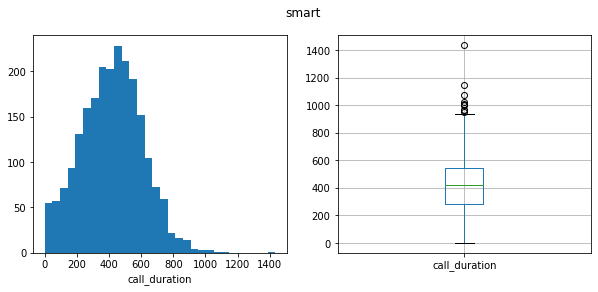

Тарифный план "ultra":

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: call_duration, dtype: float64
дисперсия: 100873.63
стандартное отклонение: 317.61



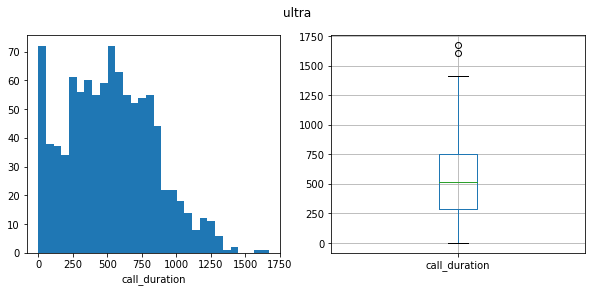

In [111]:
statistics('call_duration')

В выборке 2229 записей о пользователях на тарифном плане "Смарт". Среднее значение ежемесячной продолжительности телефонных разговоров - 417,9 минут (практически совпадает с медианным значением - 422 минуты), что несколько ниже лимита, включенного в абонентскую плату (500 минут). Дисперсия выборки равняется 36219,3, а стандартное отклонение - 190,3. Размах выборки - 1435 (минимум - 0, максимум - 1435). 


In [112]:
users_final.query('call_duration <= 500 & tariff_name == "smart"')['call_duration'].count()

1475

В 1475 наблюдений (66,1%) абоненты уложились по продолжительности разговора в установленный лимит, включенный в абонентскую плату.

По виду гистограммы можно предположить, что распределение нормальное с небольшой скошенностью вправо. В правом "хвосте" встречается несколько выбросов.

---

Выборка по тарифному плану "Ультра" состоит из 985 записей. Среднее значение длительности разговора - 526,6 минут (также близко к медианному значению - 518 минут). Дисперсия выборки - 100873,6, стандартное отклонение - 317,61. Размах выборки - 1673 (минимум - 0, максимум - 1673). К лимиту в 3000 минут, установленному оператором, никто из абонентов близко не подобрался. 

Гистограмма в общих чертах напоминает нормальное распределение, однако в глаза бросается пик около нулевых значений параметра. Рассмотрим его подробнее:

In [113]:
users_final.query('call_duration <= 60 & tariff_name == "ultra"')['call_duration'].count()

75

В 75 наблюдениях (7,6%) ежемесячные траты времени на звонки составили не более 60 минут, т.е. 2 минуты и менее ежедневно. Учитывая специфику тарифа - большой объем интернет-трафика, включенного в ежемесячную плату, - можно предположить, что эта категория пользователей выбирает более дорогой пакет ради интернета или SMS, а телефонные звонки заменяет на общение посредством мессенджеров. 

Сравнивая обе выборки, видим, что на тарифе "Ультра" больше размах, среднее и медианное значение, а также стандартное отклонение, характеризующее величину разброса от среднего. Абоненты "Ультры" в среднем дольше разговаривают по телефону, однако из общего ряда выделяется группа пользователей, практически не использующая для общения звонки.

#### 2. Количество сообщений <a name="messages"></a>

Тарифный план "smart":

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_per_month, dtype: float64
дисперсия: 796.81
стандартное отклонение: 28.23



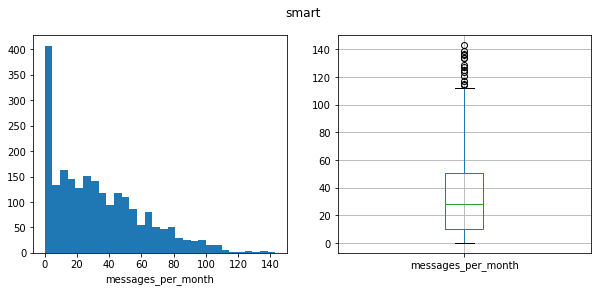

Тарифный план "ultra":

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_per_month, dtype: float64
дисперсия: 2285.27
стандартное отклонение: 47.8



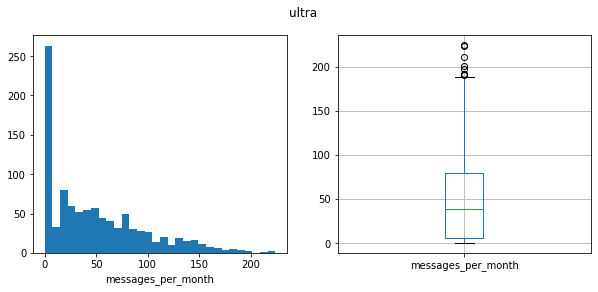

In [114]:
statistics('messages_per_month')

Среднемесячное значение числа отправленных сообщений у пользователей тарифа "Смарт" - 33,4 шт., медианное значение - 28 шт. Дисперсия выборки - 796,8, стандартное отклонение - 28,2. Размах выборки - 143 (минимум - 0, максимум - 143). Распределение не соответствует нормальному. В левой части графика аномально высокий пик, говорящий о том, что в значительной части наблюдений было отправлено минимальное число сообщений в месяц. Так, значение первого квартиля - 10. В правой части графика есть несколько выбросов (примерно от 117 сообщений ежемесячно).

In [115]:
users_final.query('messages_per_month == 0 & tariff_name == "smart"')['messages_per_month'].count()

307

307 наблюдений (13,8%) соответствуют нулевому количеству сообщений в месяц.

In [116]:
users_final.query('messages_per_month <= 50 & tariff_name == "smart"')['messages_per_month'].count()

1665

В 1665 наблюдений (74,7%) абоненты отправили меньше сообщений, чем позволял включенный в абонентскую плату лимит.

---

Среднемесячное значение количества отправленных сообщений у пользователей тарифа "Ультра" - 49,3 шт., медианное значение - 38 шт. Дисперсия выборки составляет 2285,3, стандартное отклонение - 47,8. Размах выборки - 224 (минимум - 0, максимум - 224). Максимум существенно ниже включенного в абонентскую плату лимита (1000 сообщений). 

Распределение визуально похоже на аналогичное распределение для тарифа "Смарт". В левой части графика наблюдается еще более высокий пик, соответствующий минимальному числу сообщений в месяц. В четверти случаев их количество составило всего 6 шт. В правой части графика встречаются выбросы (от 185 сообщений ежемесячно).

In [117]:
users_final.query('messages_per_month == 0 & tariff_name == "ultra"')['messages_per_month'].count()

190

190 наблюдений (19,3%) соответствуют нулевому количеству сообщений в месяц.

Сравнивая обе выборки, можно заметить, что на тарифе "Ультра" существенно больше размах, среднее и медианное значение, а также стандартное отклонение. Пользователи "Ультры" в среднем отправляют больше сообщений, при этом для обеих выборок характерен высокий пик в левом "хвосте" графика: велико количество наблюдений, которые соответствуют отсутствию отправленных сообщений или минимальному их количеству.

#### 3. Объем интернет-трафика <a name="internet"></a>

Тарифный план "smart":

count    2229.000000
mean       15.848817
std         5.739821
min         0.000000
25%        12.361328
50%        16.143555
75%        19.597656
max        37.705078
Name: gb_per_month, dtype: float64
дисперсия: 32.95
стандартное отклонение: 5.74



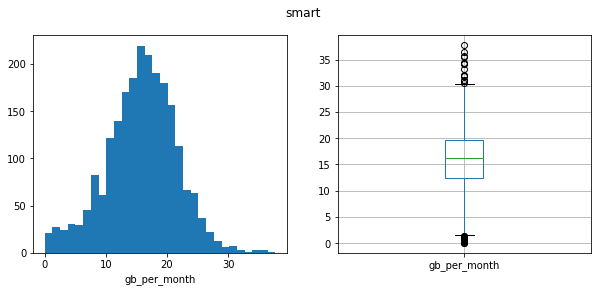

Тарифный план "ultra":

count    985.000000
mean      19.030177
std        9.859685
min        0.000000
25%       11.508789
50%       18.871094
75%       26.233398
max       48.622070
Name: gb_per_month, dtype: float64
дисперсия: 97.21
стандартное отклонение: 9.86



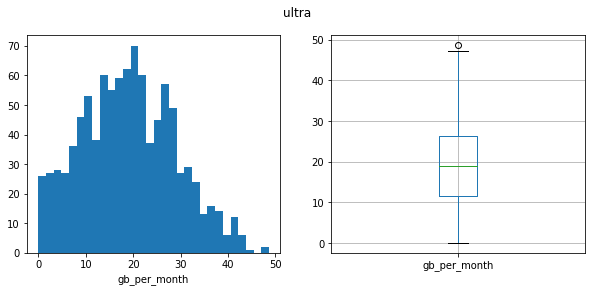

In [118]:
statistics('gb_per_month')

Среднемесячное значение объема использованного интернет-трафика у пользователей тарифа "Смарт" - 15,8 Гб в месяц, медианное значение - 16,4 Гб. Дисперсия выборки - 32,9, стандартное отклонение - 5,7. Размах выборки - 37,7 Гб (минимум - 0, максимум - 37,7). 

In [119]:
users_final.query('gb_per_month <= 15 & tariff_name == "smart"')['gb_per_month'].count()

920

В 920 наблюдениях (41,3%) пользователи уложились в лимит. В 58,7% случаев абонентам не хватило предусмотренного интернет-трафика.

Вид гистограммы соответствует нормальному распределению. В обоих "хвостах" графика встречается несколько выбросов.

---

Среднемесячное значение объема использованного интернет-трафика у пользователей тарифа "Ультра" - 19 Гб., медианное значение - 18,9 Гб. Дисперсия выборки составляет 97,21, стандартное отклонение - 9,9. Размах выборки - 48,6 Гб (минимум - 0, максимум - 48,6). 

In [120]:
users_final.query('gb_per_month <= 30 & tariff_name == "ultra"')['gb_per_month'].count()

851

В 851 наблюдениях (86,4%) пользователям хватило включенного в абонентскую плату объема интернет-трафика. В остальных случаях лимит был превышен. 

Распределение визуально похоже на нормальное, однако несколько скошено вправо. В правом хвосте присутствует один выброс.

Как и в случае с продолжительностью звонков и отправленных сообщений, на тарифе "Ультра" больше размах, среднее и медианное значение, а также стандартное отклонение объема использованного интернет-трафика. Обе выборки нормально распределены.

**Вывод**

Для выборки по тарифу "Ультра" характерно превышение всех статистик по сравнению с тарифом "Смарт":

- среднего значения:
    - по продолжительности звонков: 526,6 мин. против 417,9 мин.;
    - по числу сообщений: 49,3 шт. против 33,4 шт.;
    - по объему интернет-трафика: 19 Гб против 15,8 Гб;
- дисперсии:
    - по продолжительности звонков: 100873,6. против 36219,3;
    - по числу сообщений: 2285,3 против 796,8;
    - по объему интернет-трафика: 97,2 против 32,9;
- стандартного отклонения:
    - по продолжительности звонков: 317,6 мин. против 190,3 мин.;
    - по числу сообщений: 47,8 шт. против 28,2;
    - по объему интернет-трафика: 9,9 Гб против 5,7 Гб;

Можно утверждать, что распределения носят нормальный характер для продолжительности звонков и объема интернет-трафика для обоих тарифов. Однако стоит отметить нехарактерный выброс в левой части гистограммы на тарифе "Ультра" в выборке по звонкам: в 7,6% наблюдений длительность звонков составляет менее 60 минут в месяц. Можно предположить, что эта категория пользователей выбирает более дорогой пакет ради большего объема интернет-трафика, а телефонные звонки заменяет на общение в мессенджерах.

Распределение выборок по отправленным сообщениям для обоих тарифов не является нормальным и представляет собой фигуру под плавно нисходящей в сторону оси Х кривой, при этом в левой части графика наблюдается аномальный пик, соответствующий существенному числу наблюдений с минимальным количеством  сообщений (нулевые значения для 13,8% наблюдений на тарифе "Смарт" и для 19,3% наблюдений на тарифе "Ультра").

Отметим также, что на тарифе "Смарт" лимит, включенный в абонентскую плату, оказывается превышен в определенной доле наблюдений по всем параметрам (33,9% - в части продолжительности звонков, 25,3% - в части числа отправленных сообщений, 58,7% - в части объема интернет-трафика). На тарифе "Ультра" пороговые значения для звонков и сообщений ни разу превышены не были, а вот интернет-трафика не хватило в 13,6% случаев.


### Шаг 4. Проверка гипотез <a name="hypothesis"></a>

Проверим следующие гипотезы:

- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 


#### 1. Средняя выручка пользователей  на разных тарифах <a name="revenue_tariffs"></a>

**Нулевая гипотеза**: "Средние выручки пользователей тарифов "Ультра" и "Смарт" одинаковы".

**Альтернативная гипотеза**: "Средние выручки пользователей тарифов "Ультра" и "Смарт" отличаются". 

В соответствии с формулировкой альтернативной гипотезы будем применять **двусторонний критерий**. Поскольку объемы выборок достаточно большие (2229 для тарифа "Смарт" и 985 для тарифа "Ультра"), в качестве критического уровеня статистической значимости возьмем значение **0.01**.

In [121]:
alpha = 0.01

In [122]:
t_smart = users_final.loc[users_final['tariff_name'] == 'smart']['month_revenue']

In [123]:
t_ultra = users_final.loc[users_final['tariff_name'] == 'ultra']['month_revenue']

Посмотрим на средние значения выручки для каждого тарифа:

In [124]:
t_smart.mean()

1233.3494665489009

In [125]:
t_ultra.mean()

2060.5299710501267

Средняя выручка пользователей тарифа "Смарт" составляет 59,8% от средней выручки пользователей тарифа "Ультра".

Проведем статистический тест:

In [126]:
result_tariffs = st.ttest_ind(t_smart, t_ultra)

In [127]:
print('p-значение:', result_tariffs.pvalue)

p-значение: 1.172655564462924e-190


Полученный уровень значимости существенно ниже выбранного критического уровня, поэтому есть основания отвергнуть нулевую гипотезу о равенстве средних выручек тарифов "Ультра" и "Смарт".

#### 2. Средняя выручка пользователей в Москве и регионах <a name="revenue_regions"></a>

In [128]:
rev_Moscow = users_final.loc[users_final['city'] == 'Москва']['month_revenue']

In [129]:
rev_regions = users_final.loc[users_final['city'] != 'Москва']['month_revenue']

In [130]:
rev_Moscow.shape[0]

611

In [131]:
rev_regions.shape[0]

2603

**Нулевая гипотеза**: "Средние выручки пользователей из Москвы и остальных регионов одинаковы".

**Альтернативная гипотеза**: "Средние выручки пользователей из Москвы и остальных регионов отличаются". 

В соответствии с формулировкой альтернативной гипотезы будем применять **двусторонний критерий**. Объемы обеих выборок достаточно большие, поэтому в качестве критического уровеня статистической значимости снова возьмем значение **0.01**.

In [132]:
alpha = 0.01

Посмотрим на средние значения выручки для Москвы и регионов:

In [133]:
rev_Moscow.mean()

1507.276761968085

In [134]:
rev_regions.mean()

1482.0637267996062

Средние значения выручек отличаются незначительно. Проведем статистический тест.

In [135]:
result_tariffs = st.ttest_ind(rev_Moscow, rev_regions)

In [136]:
print('p-значение:', result_tariffs.pvalue)

p-значение: 0.47443187631524797


Полученное р-значение говорит о том, что вероятность ошибиться, отвергая нулевую гипотезу, в то время как она верна, очень высока - более 47%. Таким образом, нет оснований оклонить гипотезу о равенстве средних выручек пользователей из Москвы и остальных регионов.

**Вывод**

Статистические тесты приводят к следующим заключениям:

- среднемесячная выручка пользователей тарифа "Смарт" составляет 1233 р., тарифа "Ультра" - 2060 р.;
- различия между выборками пользователей на разных тарифах обнаружены на высоком уровне статистической значимости, поэтому есть основания отвергнуть нулевую гипотезу о равенстве средних выручек;


- среднемесячная выручка абонентов из Москвы составляет 1507 р., пользователей из остальных регионов - 1482 р.;
- результаты статистического теста не значимы на 1%-м уровне; полученное р-значение не позволяет отвергнуть нулевую гипотезу о равенстве средних выручек пользователей из Москвы и регионов.

### Шаг 5. Общий вывод <a name="conclusion"></a>

В работе был проведен анализ тарифов "Ультра" и "Смарт" на выборке из 500 клиентов оператора сотовой связи "Мегалайн". Исследование позволяет сделать следующие выводы.

В целом абоненты "Ультры" более активно пользуются предоставленными услугами: выше и среднемесячная продолжительность звонков, и количество отправленных сообщений, и объем использованного интернет-траффика. В совокупности с тарифной политикой сотового оператора это приводит к тому, что среднемесячные выручки существенно различаются: у пользователей тарифа "Смарт" показатель составляет 1233 р., а у пользователей тарифа "Ультра" - 2060 р. Указанное различие статистически значимо, что позволяет сделать вывод о большей выгодности для сотового оператора тарифного плана "Ультра".

Вместе с тем стоит отметить следующие детали:

- в 7,6% наблюдений длительность звонков абонентов "Ультры" аномально мала (менее 60 минут в месяц). Вероятно, эта категория пользователей выбирает более дорогой пакет ради большего объема интернет-трафика, а телефонные звонки заменяет на общение в мессенджерах. Для тарифа "Смарт" эта особенность выражена значительно слабее. С учетом тенденций развития технологий связи можно предполагать, что доля общения посредством интернет-технологий будет только увеличиваться, а обычных звонков - снижаться.
- на более дешевом тарифе "Смарт" лимит, включенный в абонентскую плату, оказывается превышен в определенной доле наблюдений по всем параметрам (33,9% - в части продолжительности звонков, 25,3% - в части числа отправленных сообщений, 58,7% - в части объема интернет-трафика). На тарифе "Ультра" лимиты для звонков и сообщений установлены очень высоко и ни разу не были израсходованы полностью, а вот интернет-трафика не хватило в 13,6% случаев.

Таким образом, имеет место нехватка включенного в абонентскую плату лимита на интернет-трафик для пользователей обоих тарифов. С одной стороны, это возможность оператора получить комиссию за превышение лимитов. С другой стороны, не исключено, что недовольство пользователей слишком низкими лимитами и необходимостью дополнительной оплаты приведет к их оттоку. Следующим шагом для компании могло бы стать исследование рынка конкурентов и корректировка лимитов интернет-трафика для предотвращения ухода абонентов.

Можно также предположить, что в тарифной линейке не хватает промежуточного предложения: в трети наблюдений по тарифу "Смарт" пользователям недостает лимита на звонки, в четверти - на количество сообщений, почти в 60% - на объем интернет-трафика. При этом единственная альтернатива - тариф "Ультра" - стоит почти в четыре раза дороже и имеет настолько высокие лимиты, что их практически не реально использовать. Оператору стоило бы рассмотреть вариант предложения пакета услуг с абонентской платой дороже "Смарта" и дешевле "Ультры" и с промежуточными значениями лимитов. 

Наконец, отметим, что среднемесячная выручка абонентов из Москвы составляет 1507 р., пользователей из остальных регионов - 1482 р. В исследовании не был получен статистически значимый результат, который бы подтверждал их различие. Если в среднем пользователи из регионов платят столько же, сколько пользователи из Москвы, можно предложить оператору рассмотреть вариант региональных тарифов. Уровень жизни, платежеспособность и деловая активность москвичей выше по сравнению с регионами, поэтому Москва - это потенциальный регион по приросту выручки.

